In [54]:
import numpy as np
import pandas as pd
import spacy
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/hate-speech/labeled_data.csv')

In [4]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
df.shape

(24783, 7)

In [8]:
df.drop(columns = ['Unnamed: 0', 'count', 'hate_speech',	'offensive_language',	'neither'], inplace = True)

In [9]:
df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [11]:
df.isnull().sum()

class    0
tweet    0
dtype: int64

In [14]:
df['tweet'].iloc[5]

'!!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;"'

In [16]:
df['tweet'].iloc[100]

'"@ClicquotSuave: LMAOOOOOOOOOOO this nigga @Krillz_Nuh_Care http://t.co/AAnpSUjmYI" &lt;bitch want likes for some depressing shit..foh'

In [18]:
df['tweet'].iloc[1000]

'&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;"@betysweetcocker: That pussy is just....&#128561; imma assume she just had a baby like..the day before"'

In [19]:
df['pre_text'] = df['tweet'].str.replace(r'[^a-zA-Z]', ' ', regex = True)

In [20]:
df.head()

,class,tweet,pre_text
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,RT mayasolovely As a woman you shouldn t...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,RT mleew boy dats cold tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,RT UrKindOfBrand Dawg RT sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,RT C G Anderson viva based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,RT ShenikaRoberts The shit you...


In [22]:
df['pre_text'].iloc[5]

'                    T Madison x  The shit just blows me  claim you so faithful and down for somebody but still fucking with hoes                              '

In [24]:
df['pre_text'].iloc[1000]

'                                                                 betysweetcocker  That pussy is just              imma assume she just had a baby like  the day before '

In [25]:
df['pre_text_2'] = df['pre_text'].str.replace(r'[\s]+', ' ', regex = True)

In [26]:
df.head()

,class,tweet,pre_text,pre_text_2
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,RT mayasolovely As a woman you shouldn t...,RT mayasolovely As a woman you shouldn t comp...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,RT mleew boy dats cold tyga dwn ba...,RT mleew boy dats cold tyga dwn bad for cuffi...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,RT UrKindOfBrand Dawg RT sbaby...,RT UrKindOfBrand Dawg RT sbaby life You ever ...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,RT C G Anderson viva based she lo...,RT C G Anderson viva based she look like a tr...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,RT ShenikaRoberts The shit you...,RT ShenikaRoberts The shit you hear about me ...


In [27]:
df['pre_text_2'].iloc[1000]

' betysweetcocker That pussy is just imma assume she just had a baby like the day before '

In [28]:
df.drop(columns = ['tweet', 'pre_text'], inplace = True)

In [29]:
df.head()

,class,pre_text_2
0,2,RT mayasolovely As a woman you shouldn t comp...
1,1,RT mleew boy dats cold tyga dwn bad for cuffi...
2,1,RT UrKindOfBrand Dawg RT sbaby life You ever ...
3,1,RT C G Anderson viva based she look like a tr...
4,1,RT ShenikaRoberts The shit you hear about me ...


In [31]:
nlp = spacy.load('en_core_web_sm')

In [33]:
def lemmatisation(text):
    doc = nlp(text)
    lemmalist = [word.lemma_ for word in doc ]
    return ' '.join(lemmalist)

In [35]:
df['lemma'] = df['pre_text_2'].apply(lemmatisation)

In [36]:
df.head()

,class,pre_text_2,lemma
0,2,RT mayasolovely As a woman you shouldn t comp...,RT mayasolovely as a woman you shouldn t com...
1,1,RT mleew boy dats cold tyga dwn bad for cuffi...,RT mleew boy dat cold tyga dwn bad for cuffi...
2,1,RT UrKindOfBrand Dawg RT sbaby life You ever ...,RT UrKindOfBrand Dawg RT sbaby life you ever...
3,1,RT C G Anderson viva based she look like a tr...,RT C G Anderson viva base she look like a tr...
4,1,RT ShenikaRoberts The shit you hear about me ...,RT ShenikaRoberts the shit you hear about I ...


In [37]:
df['lemma'].iloc[5]

'  T Madison x the shit just blow I claim you so faithful and down for somebody but still fuck with hoe'

In [38]:
def remove_stopwords(text):
    doc = nlp(text)
    no_stopword_list = [word.text for word in doc if not word.is_stop]
    return ' '.join(no_stopword_list)

In [40]:
df['final'] = df['lemma'].apply(remove_stopwords)

In [41]:
df.head()

,class,pre_text_2,lemma,final
0,2,RT mayasolovely As a woman you shouldn t comp...,RT mayasolovely as a woman you shouldn t com...,RT mayasolovely woman shouldn t complain cl...
1,1,RT mleew boy dats cold tyga dwn bad for cuffi...,RT mleew boy dat cold tyga dwn bad for cuffi...,RT mleew boy dat cold tyga dwn bad cuffin d...
2,1,RT UrKindOfBrand Dawg RT sbaby life You ever ...,RT UrKindOfBrand Dawg RT sbaby life you ever...,RT UrKindOfBrand Dawg RT sbaby life fuck bi...
3,1,RT C G Anderson viva based she look like a tr...,RT C G Anderson viva base she look like a tr...,RT C G Anderson viva base look like tranny
4,1,RT ShenikaRoberts The shit you hear about me ...,RT ShenikaRoberts the shit you hear about I ...,RT ShenikaRoberts shit hear true faker bitc...


In [42]:
df['final'].iloc[5]

'   T Madison x shit blow claim faithful somebody fuck hoe'

# **ONE HOT REPRESANTION FOR LSTM**

In [45]:
vocab_size = 10000
one_hot_represantion = [one_hot(words, vocab_size) for words in df['final']]

In [46]:
df['final'].iloc[0]

'   RT mayasolovely woman shouldn t complain clean house amp man trash'

In [47]:
one_hot_represantion[0]

[9838, 2286, 4753, 7719, 5753, 6280, 441, 2259, 9376, 2574, 72]

In [48]:
df['final'].iloc[:4]

0       RT mayasolovely woman shouldn t complain cl...
1       RT mleew boy dat cold tyga dwn bad cuffin d...
2       RT UrKindOfBrand Dawg RT sbaby life fuck bi...
3           RT C G Anderson viva base look like tranny
Name: final, dtype: object

In [49]:
one_hot_represantion[:4]

[[9838, 2286, 4753, 7719, 5753, 6280, 441, 2259, 9376, 2574, 72],
 [9838, 7096, 4256, 235, 4586, 3222, 8937, 5391, 6490, 235, 8254, 6341, 2076],
 [9838, 8432, 7186, 9838, 6465, 4997, 7704, 844, 8454, 697, 9459, 684],
 [9838, 8359, 1557, 6745, 7999, 3246, 8946, 6360, 7773]]

# **PADDING AND EMBEDDING** 

In [50]:
sentence_length = 20
embedded_tweet = pad_sequences(one_hot_represantion, padding = 'pre', maxlen = sentence_length)

In [51]:
embedded_tweet[:4]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0, 9838, 2286,
        4753, 7719, 5753, 6280,  441, 2259, 9376, 2574,   72],
       [   0,    0,    0,    0,    0,    0,    0, 9838, 7096, 4256,  235,
        4586, 3222, 8937, 5391, 6490,  235, 8254, 6341, 2076],
       [   0,    0,    0,    0,    0,    0,    0,    0, 9838, 8432, 7186,
        9838, 6465, 4997, 7704,  844, 8454,  697, 9459,  684],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
        9838, 8359, 1557, 6745, 7999, 3246, 8946, 6360, 7773]],
      dtype=int32)

In [52]:
x = np.array(embedded_tweet)
y = np.array(df['class'])

In [53]:
df['class'].value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

# **SMOTE**
For imbalance dataset

In [55]:
smote = SMOTE(sampling_strategy = 'minority')
x,y = smote.fit_resample(x,y)

In [56]:
df['class'].value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [58]:
x.shape

(42543, 20)

**Shape goes from 24k to 42k due to SMOTE**

In [79]:
dimension = 50

model = keras.Sequential([
    # Embedding layer
    keras.layers.Embedding(vocab_size, dimension, input_length=sentence_length),
    # LSTM layers
    keras.layers.LSTM(100, return_sequences=True),
    keras.layers.LSTM(50, return_sequences=True),
    keras.layers.LSTM(50),
    # Output layer
    keras.layers.Dense(3, activation='softmax')
])

# Build the model
model.build(input_shape=(None, sentence_length))

# Compilation
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [80]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ (None, 20, 50)         │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_27 (LSTM)                  │ (None, 20, 100)        │        60,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_28 (LSTM)                  │ (None, 20, 50)         │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_29 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 610,953 (2.33 MB)

 Trainable params: 610,953 (2.33 MB)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.fit(x_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - accuracy: 0.7860 - loss: 0.4996
Epoch 2/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 31s 29ms/step - accuracy: 0.9428 - loss: 0.1743
Epoch 3/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 31s 29ms/step - accuracy: 0.9587 - loss: 0.1268
Epoch 4/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 31s 29ms/step - accuracy: 0.9718 - loss: 0.0924
Epoch 5/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 31s 29ms/step - accuracy: 0.9794 - loss: 0.0685
Epoch 6/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 31s 29ms/step - accuracy: 0.9843 - loss: 0.0510
Epoch 7/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 31s 29ms/step - accuracy: 0.9902 - loss: 0.0337
Epoch 8/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 31s 29ms/step - accuracy: 0.9914 - loss: 0.0264
Epoch 9/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 31s 29ms/step - accuracy: 0.9934 - loss: 0.0198
Epoch 10/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 31s 29ms/step - accuracy: 0.9951 - loss: 0.0156


In [82]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Model Accuracy : {accuracy*100}')

266/266 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8910 - loss: 0.5583
Model Accuracy : 88.89411091804504


In [83]:
pred = np.argmax(model.predict(x_test), axis = -1)

266/266 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [84]:
y_test[:5]

array([1, 1, 0, 1, 2])

In [85]:
pred[:5]

array([1, 1, 0, 1, 2])

In [86]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      3812
           1       0.92      0.90      0.91      3807
           2       0.74      0.72      0.73       890

    accuracy                           0.89      8509
   macro avg       0.85      0.85      0.85      8509
weighted avg       0.89      0.89      0.89      8509



Text(0.5, 1.0, 'CONFUSION MATRIX')

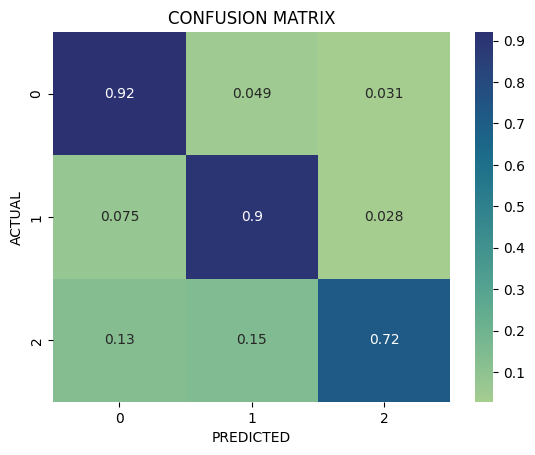

In [87]:
cf = confusion_matrix(y_test, pred, normalize = 'true')
sns.heatmap(cf, annot = True, cmap = 'crest')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.title('CONFUSION MATRIX')